# New Section

150


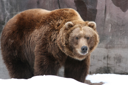

In [ ]:
!pip install fastbook
from fastbook import *
from fastai.vision.all import *
import os
key=os.environ.get('AZURE_SEARCH_KEY', '7054e8bd57904f5a965b272d1f79ec54')
results=search_images_bing(key, 'grizzly bear')
ims=results.attrgot('contentUrl')
print(len(ims))

download_url(ims[0], 'images/grizzly.jpg')
img=Image.open('images/grizzly.jpg')
img.to_thumb(128,128)

In [ ]:
bear_types='grizzly','black', 'teddy'
path=Path('bears')
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest=(path/o)
    dest.mkdir(exist_ok=True)
    results=search_images_bing(key, f'{o} bear')
    download_images(dest, urls=results.attrgot('contentUrl'))
fns=get_image_files(path)
fns

(#445) [Path('bears/teddy/00000034.jpg'),Path('bears/teddy/00000053.jpg'),Path('bears/teddy/00000132.jpg'),Path('bears/teddy/00000121.jpg'),Path('bears/teddy/00000088.jpg'),Path('bears/teddy/00000058.jpg'),Path('bears/teddy/00000110.jpg'),Path('bears/teddy/00000047.jpg'),Path('bears/teddy/00000127.jpg'),Path('bears/teddy/00000035.jpg')...]

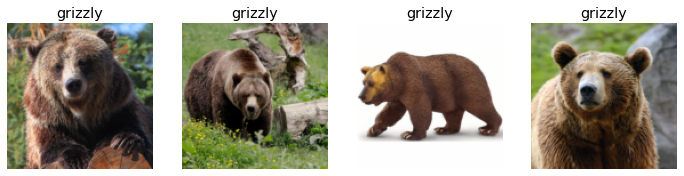

In [ ]:
bear=DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, splitter=RandomSplitter(valid_pct=0.2, seed=42), 
    get_y=parent_label, 
    item_tfms=Resize(128)
)
dls=bear.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

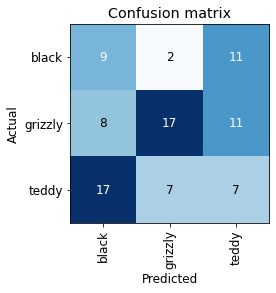

In [ ]:
bear=bear.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls=bear.dataloaders(path)
learn=cnn_learner(dls, resnet18, metrics=error_rate)
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()

In [ ]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf=load_learner(path/'export.pkl')
learn_inf.predict('images/grizzly.jpg')

('grizzly', TensorBase(1), TensorBase([0.2704, 0.5786, 0.1510]))

In [ ]:
import ipywidgets as widgets
btn_upload=widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

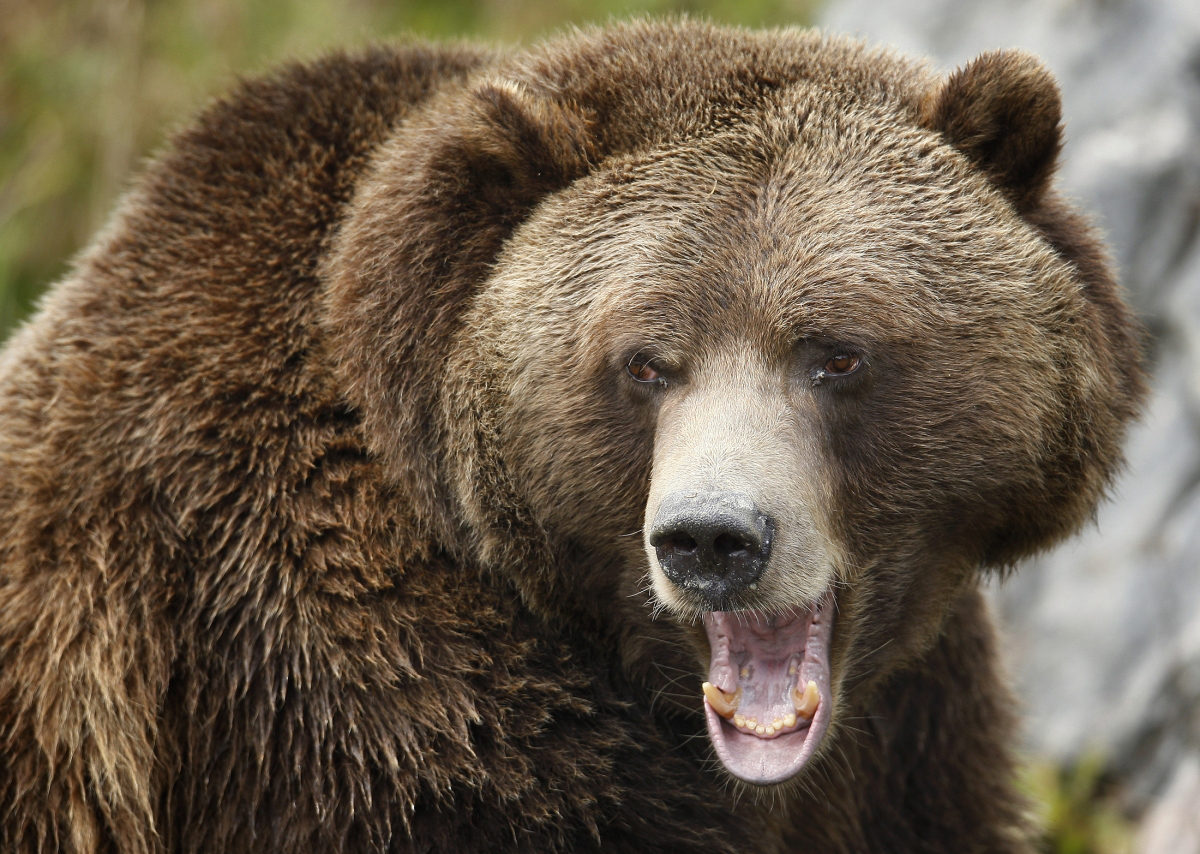

In [ ]:
img=PILImage.create(btn_upload.data[-1])
img


In [ ]:
out_pl=widgets.Output()
out_pl.clear_output()
with out_pl: 
  display(img.to_thumb(128,128))
out_pl
pred,pred_idx,probs=learn_inf.predict(img)
lbl_pred=widgets.Label()
lbl_pred.value=f'Predition:{pred}; Probability: {probs[pred_idx]}'
lbl_pred

Output()

In [ ]:
#Classification button
btn_run=widgets.Button(description='Classsify')
btn_run
def on_click_classify(change):
  img=PILImage.create(btn_upload.data[-1])
  with out_pl: 
      display(img.to_thumb(128,128))
pred,pred_idx,probs=learn_inf.predict(img)
lbl_pred=widgets.Label()
lbl_pred.value=f'Predition:{pred}; Probability: {probs[pred_idx]}'
btn_run.on_click(on_click_classify)

In [ ]:
from ipywidgets.widgets.widget_box import VBox
VBox([widgets.Label('Select your Bear'), btn_upload, btn_run, out_pl, lbl_pred])